<a href="https://colab.research.google.com/github/stelmanj/MusicAndLanguage/blob/master/A_Brief_Analysis_of_Lyric_Text_Metrics_in_5_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this mini analysis of lyric data, I explore a few features of lyric exerpts from 100 songs in 5 different languages. I compare 20 songs written in each language. I want to know if a language spoken across a wider geographical area, in turn, constitutes a language with a broader collection of regional vocabularies, and, in turn, leads to a sample of songs whose joint lyrics utilize a larger set of words than a language spoken across a smaller geographical range does.

In other words, do the songs written by, say, Spanish speaking artists vary more, lyrically, than songs written by, say, Indonesian artists? It would make sense, as Spanish is spoken all over the world, heightening the potential that this language has been split into different dialects by divergent evolution. Meanwhile, Indonesian is only spoken, officially, in Indonesia, a region that, based on the small size of its land area and longitudal range, doesn't look like it provides the Indondesian language as much potential for forming individual dialects. 

The following two languages make up the *widely spoken* group:

* English (en)

* Spanish (es)

The following three languages make up the *not widely spoken* group:

* Indonesian (id)

* Dutch (nl)

* Swahili (sw)

The distinction between the first and second groups is decided by whether a language is an official national language on at least three continents. 

# Summarizing the Data

I've used the natural language processing package $\verb|quanteda|$ to calculate the following metrics for the first few lines of lyrics in each of the 100 sampled songs. (20 songs were randomly sampled from each of the 5 languages.)

* Types --> distinct words

* Tokens --> words

* Type/Token Ratio (TTR)


Let's load in the data frames we made in DataPreparation.

In [0]:
lyrics_sum_avgd <- read.csv(
  "https://github.com/stelmanj/MusicAndLanguage/blob/master/BAT1_lsum_avgd.csv?raw=true",
  row.names = 1, stringsAsFactors = FALSE) 

lyrics_sum_cat <- read.csv(
  "https://github.com/stelmanj/MusicAndLanguage/blob/master/BAT2_lsum_cat.csv?raw=true",
  row.names = 1, stringsAsFactors = FALSE) 

esinw_df <- read.csv(
  "https://github.com/stelmanj/MusicAndLanguage/blob/master/AFS_esinw.csv?raw=true",
  row.names = 1, stringsAsFactors = FALSE) 

I summarized these as by-language averages in the table below. 

In [0]:
lyrics_sum_avgd

,Language,Avg.Tokens.per.Lyric.Excerpt,Avg.Types.per.Lyric.Excerpt,Avg.Type.Token.Ratio..TTR.
,<chr>,<int>,<dbl>,<dbl>
1,en,129,68.65,0.540
2,es,100,54.90,0.550
3,id,70,45.50,0.648
4,nl,126,69.30,0.557
5,sw,109,59.90,0.568


After concatenating together the 20-song random sample of lyric excerpts from each language, I re-calculated the metrics again treating the combination of all sampled lyrics from one language as if it were from one song. (The code for how I did this is in the Appendix) They are shown in the table below. It's this information that will give me insight on what I'm really looking for. 

In [0]:
lyrics_sum_cat

,Language,Types,Tokens,TTR
,<chr>,<int>,<int>,<dbl>
1,en,582,2588,0.225
2,es,547,2010,0.272
3,id,477,1399,0.341
4,nl,619,2515,0.246
5,sw,882,2178,0.405


# Exploratory Data Analysis

Let's take a look at some histograms and qq-plots of token counts to get a better look.



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




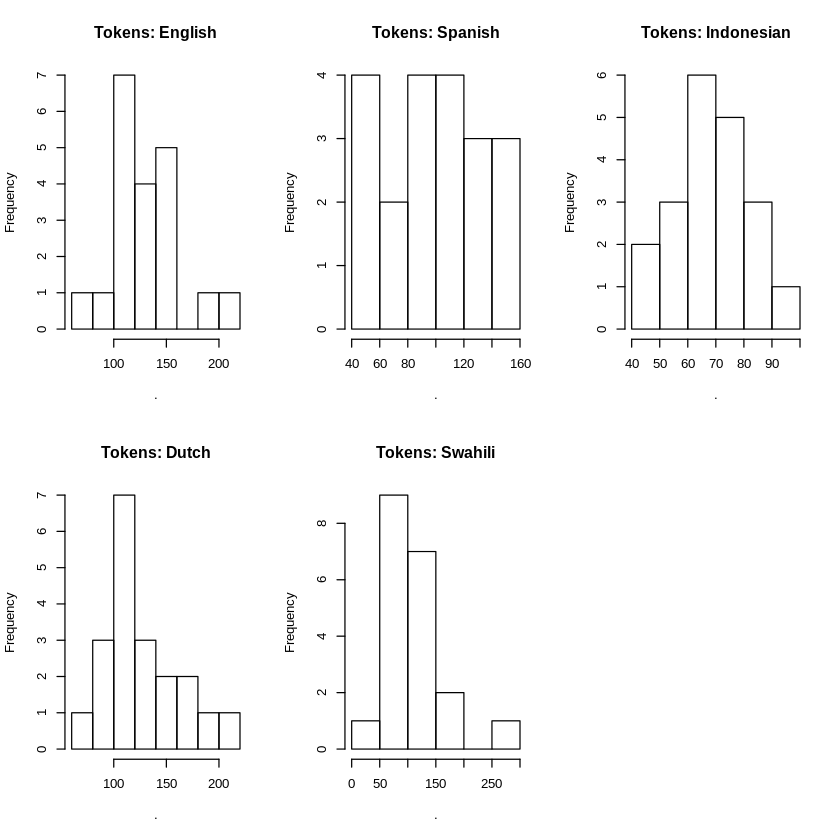

In [0]:
library(dplyr)

par(mfrow = c(2,3))
esinw_df$Tokens[esinw_df$lang == "en"] %>% 
  hist(main = "Tokens: English")
esinw_df$Tokens[esinw_df$lang == "es"] %>% 
  hist(main = "Tokens: Spanish")
esinw_df$Tokens[esinw_df$lang == "id"] %>% 
  hist(main = "Tokens: Indonesian")
esinw_df$Tokens[esinw_df$lang == "nl"] %>% 
  hist(main = "Tokens: Dutch")
esinw_df$Tokens[esinw_df$lang == "sw"] %>% 
  hist(main = "Tokens: Swahili")

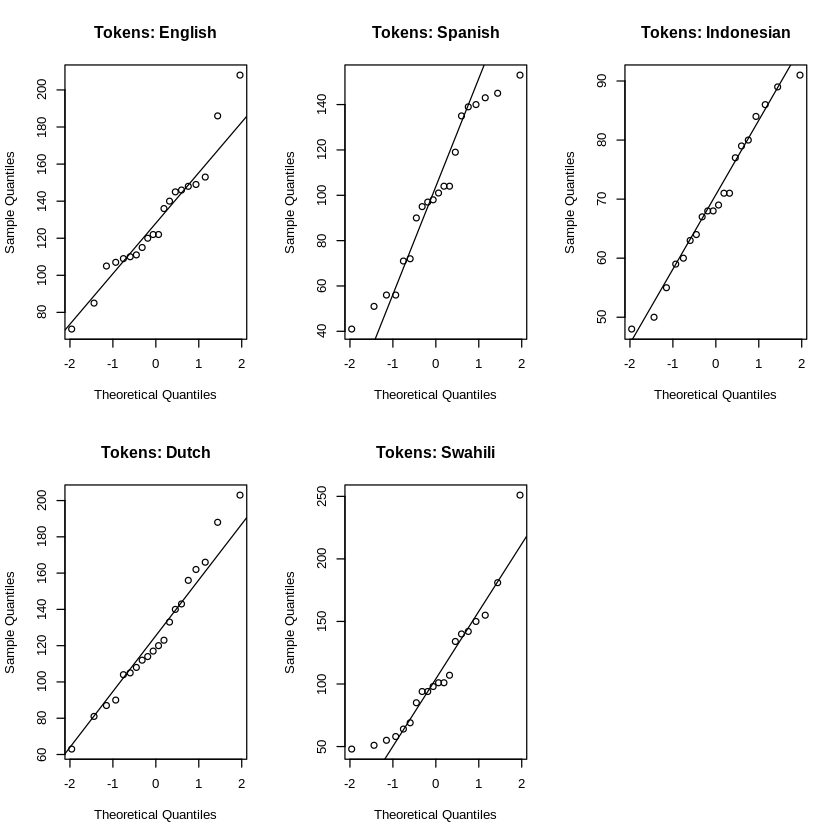

In [0]:
par(mfrow = c(2,3))
esinw_df$Tokens[esinw_df$lang == "en"] %>% 
  qqnorm(main = "Tokens: English")
esinw_df$Tokens[esinw_df$lang == "en"] %>% qqline()

esinw_df$Tokens[esinw_df$lang == "es"] %>% 
  qqnorm(main = "Tokens: Spanish")
esinw_df$Tokens[esinw_df$lang == "es"] %>% qqline()

esinw_df$Tokens[esinw_df$lang == "id"] %>% 
  qqnorm(main = "Tokens: Indonesian")
esinw_df$Tokens[esinw_df$lang == "id"] %>% qqline()

esinw_df$Tokens[esinw_df$lang == "nl"] %>% 
  qqnorm(main = "Tokens: Dutch")
esinw_df$Tokens[esinw_df$lang == "nl"] %>% qqline()

esinw_df$Tokens[esinw_df$lang == "sw"] %>% 
  qqnorm(main = "Tokens: Swahili")
esinw_df$Tokens[esinw_df$lang == "sw"] %>% qqline()

It seems there are no large gaps and no big outliers in the histograms. In general, it definitely looks like Indonesian's song lyric excerpts run small compared to other languages'. Indonesian's token count range is about half that of other languages.

Based on the qq-plots, the normality of most of these distributions is called to question. One of my concerns is that these qqplots show points situated in tiers rather than along a continuum. This could be an effect of a lurking categorical variable, perhaps something like genre. It could also be due to the way the lyrics were collected by musixmatch, or the way they were cropped into excerpts. 

Let's also do the same thing for type counts, just for good measure.

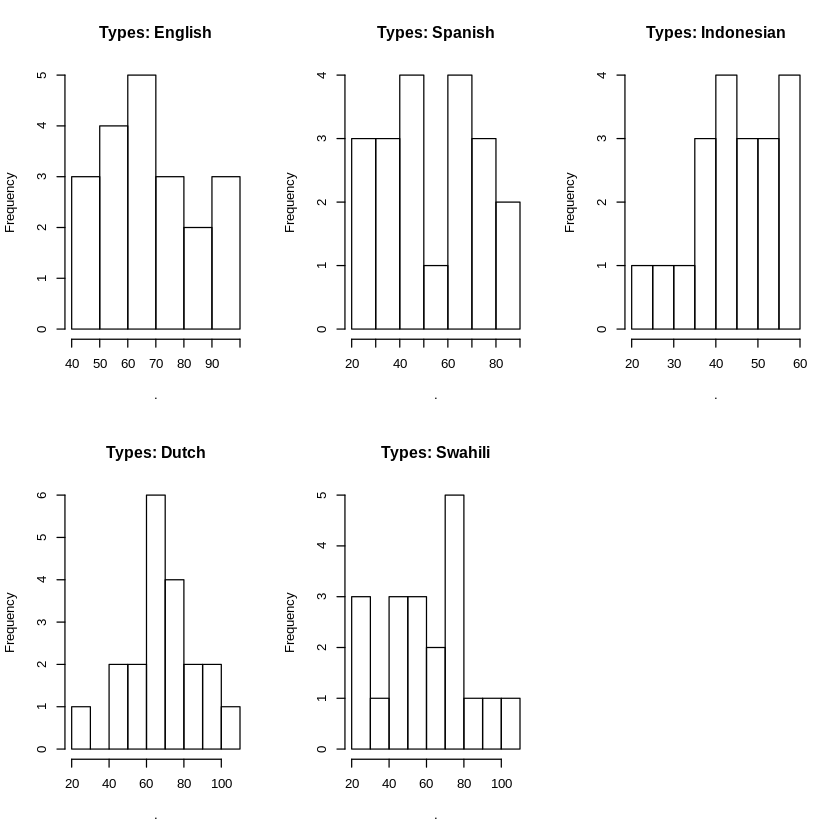

In [0]:
par(mfrow = c(2,3))
esinw_df$Types[esinw_df$lang == "en"] %>% 
  hist(main = "Types: English")
esinw_df$Types[esinw_df$lang == "es"] %>% 
  hist(main = "Types: Spanish")
esinw_df$Types[esinw_df$lang == "id"] %>% 
  hist(main = "Types: Indonesian")
esinw_df$Types[esinw_df$lang == "nl"] %>% 
  hist(main = "Types: Dutch")
esinw_df$Types[esinw_df$lang == "sw"] %>% 
  hist(main = "Types: Swahili")

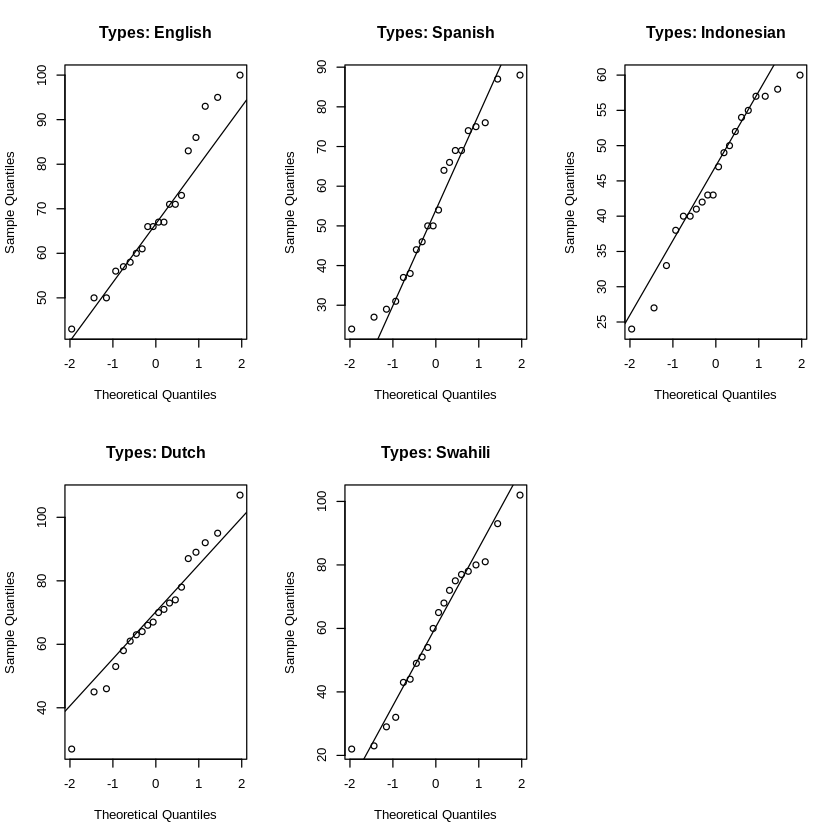

In [0]:
par(mfrow = c(2,3))
esinw_df$Types[esinw_df$lang == "en"] %>% 
  qqnorm(main = "Types: English")
esinw_df$Types[esinw_df$lang == "en"] %>% qqline()

esinw_df$Types[esinw_df$lang == "es"] %>% 
  qqnorm(main = "Types: Spanish")
esinw_df$Types[esinw_df$lang == "es"] %>% qqline()

esinw_df$Types[esinw_df$lang == "id"] %>% 
  qqnorm(main = "Types: Indonesian")
esinw_df$Types[esinw_df$lang == "id"] %>% qqline()

esinw_df$Types[esinw_df$lang == "nl"] %>% 
  qqnorm(main = "Types: Dutch")
esinw_df$Types[esinw_df$lang == "nl"] %>% qqline()

esinw_df$Types[esinw_df$lang == "sw"] %>% 
  qqnorm(main = "Types: Swahili")
esinw_df$Types[esinw_df$lang == "sw"] %>% qqline()

Frankly, all ten of these histograms and all ten of these qq-plots are far from the normal distribution, but, for the extent of their use in this brief analysis, the data here will work fine. The invesigation will not rely too much on assumed normality anyway. As a final check, let's plot type count against token count in scatter plots.

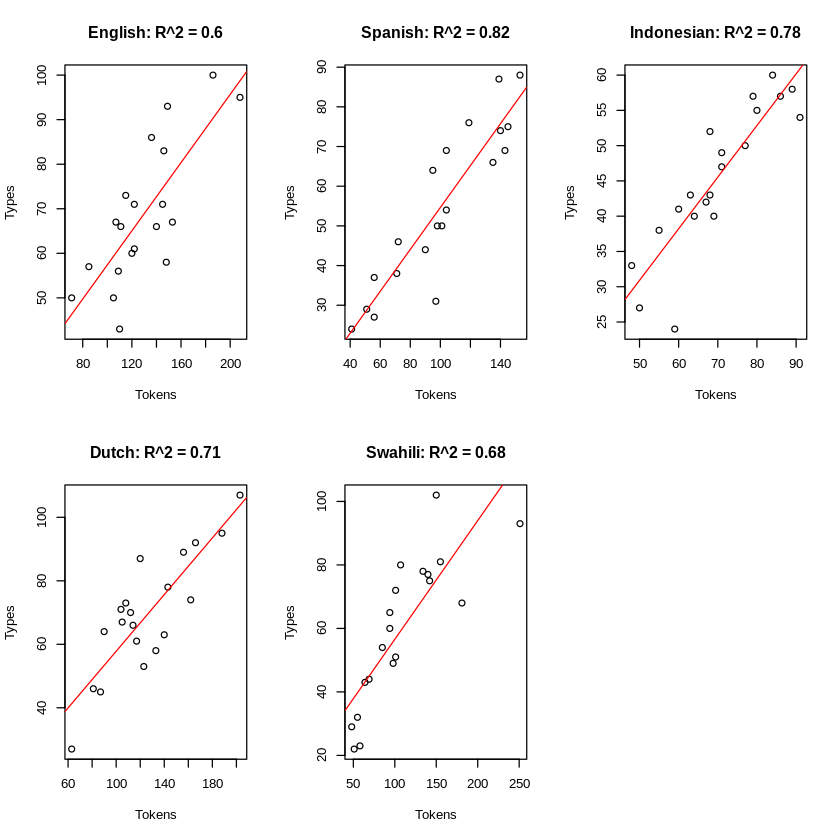

In [0]:
par(mfrow = c(2,3))

# plot the Types vs Tokens scatterplot for each language
# include each one's Rsquared in the plot title
# draw each LSRL in red

# English
esinw_df[esinw_df$lang == "en",c('Tokens','Types')] %>% 
  plot(main = paste(
    "English: R^2 =",
    # calculate the R squared and paste it into the plot title
    summary(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="en",]))$r.squared %>%
      round(2)))
abline(
  # plot the LSRL in red
  coef(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="en",])),
  col = "red")

# Spanish
esinw_df[esinw_df$lang == "es",c('Tokens','Types')] %>% 
  plot(main = paste(
    "Spanish: R^2 =",
    # calculate the R squared and paste it into the plot title
    summary(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="es",]))$r.squared %>%
      round(2)))
abline(
  # plot the LSRL in red
  coef(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="es",])),
  col = "red")

# Indonesian
esinw_df[esinw_df$lang == "id",c('Tokens','Types')] %>% 
  plot(main = paste(
    "Indonesian: R^2 =",
    # calculate the R squared and paste it into the plot title
    summary(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="id",]))$r.squared %>%
      round(2)))
abline(
  # plot the LSRL in red
  coef(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="id",])),
  col = "red")

# Dutch
esinw_df[esinw_df$lang == "nl",c('Tokens','Types')] %>% 
  plot(main = paste(
    "Dutch: R^2 =",
    # calculate the R squared and paste it into the plot title
    summary(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="nl",]))$r.squared %>%
      round(2)))
abline(
  # plot the LSRL in red
  coef(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="nl",])),
  col = "red")

# Swahili
esinw_df[esinw_df$lang == "sw",c('Tokens','Types')] %>% 
  plot(main = paste(
    "Swahili: R^2 =",
    # calculate the R squared and paste it into the plot title
    summary(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="sw",]))$r.squared %>%
      round(2)))
abline(
  # plot the LSRL in red
  coef(lm(Types~Tokens, data=esinw_df[esinw_df$lang=="sw",])),
  col = "red")

While these distributions aren't ideal, we just need evidence that there isn't some big bad underlying problem that we should worry is potentially corrupting the patterns that we are seeing. Based on the histograms, qqplots, and scatter plots above, I'm convinced. I wish I were more convinced, but let's continue.

# Results

In the plot below, the widely spoken languages are drawn in red. The numbers used to make these plots are all taken from the tables in the **Summarizing the Data** section.

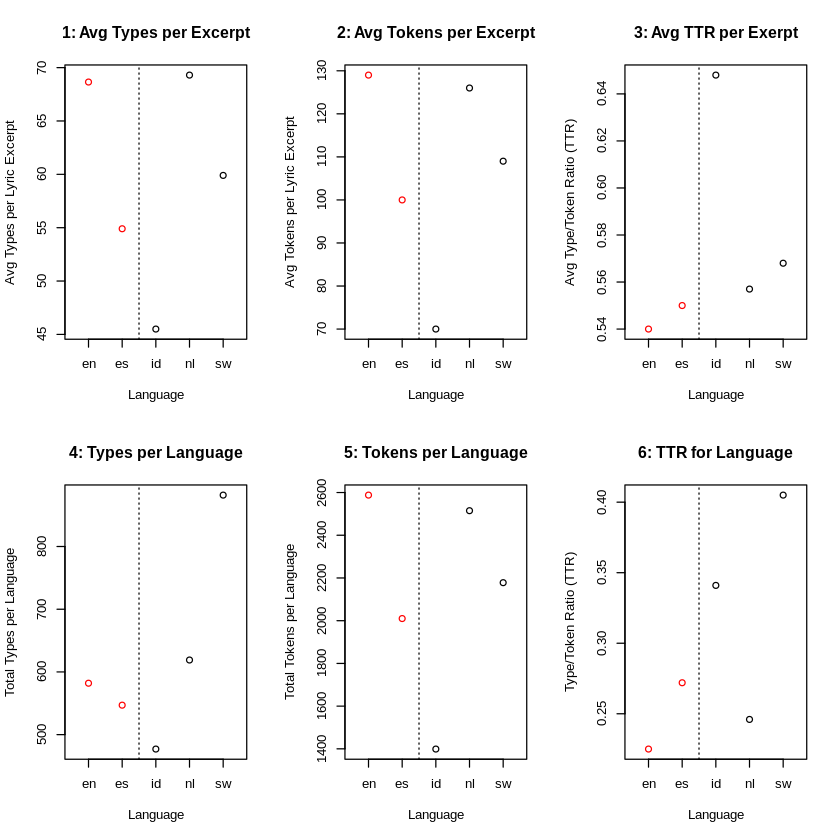

In [0]:
# set up the ploting region
par(mfrow = c(2,3))
# plot each of the three metrics from the first table and then each from the second preserving order
# widely spoken langauges in red, not-widely spoken languages in black
#x axis is the going to be factors, the five languages
# y axes will tell us the values of the each metric pertaining to each language

# first the averages
plot(x = factor(lyrics_sum_avgd$Language),
     y = lyrics_sum_avgd$Avg.Types.per.Lyric.Excerpt, 
     border = "white",
     xlab = "Language", 
     ylab = "Avg Types per Lyric Excerpt",
     main = "1: Avg Types per Excerpt"
     ); points(x = factor(lyrics_sum_avgd$Language),
       y = lyrics_sum_avgd$Avg.Types.per.Lyric.Excerpt, 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)
plot(x = factor(lyrics_sum_avgd$Language),
     y = lyrics_sum_avgd$Avg.Tokens.per.Lyric.Excerpt, 
     border = "white",
     xlab = "Language", 
     ylab = "Avg Tokens per Lyric Excerpt",
     main = "2: Avg Tokens per Excerpt"
     ); points(x = factor(lyrics_sum_avgd$Language),
       y = lyrics_sum_avgd$Avg.Tokens.per.Lyric.Excerpt, 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)
plot(x = factor(lyrics_sum_avgd$Language),
     y = lyrics_sum_avgd$Avg.Type.Token.Ratio..TTR., 
     border = "white",
     xlab = "Language", 
     ylab = "Avg Type/Token Ratio (TTR)",
     main = "3: Avg TTR per Exerpt"
     ); points(x = factor(lyrics_sum_avgd$Language),
       y = lyrics_sum_avgd$Avg.Type.Token.Ratio..TTR., 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)

# then the totals (the concatenated versions)
plot(x = factor(lyrics_sum_cat$Language),
     y = lyrics_sum_cat$Types, 
     border = "white",
     xlab = "Language", 
     ylab = "Total Types per Language",
     main = "4: Types per Language"
     ); points(x = factor(lyrics_sum_cat$Language),
       y = lyrics_sum_cat$Types, 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)
plot(x = factor(lyrics_sum_cat$Language),
     y = lyrics_sum_cat$Tokens, 
     border = "white",
     xlab = "Language", 
     ylab = "Total Tokens per Language",
     main = "5: Tokens per Language"
     ); points(x = factor(lyrics_sum_cat$Language),
       y = lyrics_sum_cat$Tokens, 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)
plot(x = factor(lyrics_sum_cat$Language),
     y = lyrics_sum_cat$TTR, 
     border = "white",
     xlab = "Language", 
     ylab = "Type/Token Ratio (TTR)",
     main = "6: TTR for Language"
     ); points(x = factor(lyrics_sum_cat$Language),
       y = lyrics_sum_cat$TTR, 
       col = c("red","red","black","black","black")
       ); abline(v = 2.5,lty = 3)

Based on Plot 6, the words used in different Swahili songs have the least in common out of any of the five languages-- and by a long shot! 

Based on Plot 2, it would seem that the Indonesian songs, on average, have rather few words, therefore inflating the Type/Token Ratio of individual Indonesian songs (Plot 3). When the Indonesian lyrics are pooled, the effect on TTR (Plot 6) of low token count (Plot 5) is countered by the effect of low type count (Plot 4), propelling it into second place (Plot 6). 

Notice that, in Plots 4 and 5, Spanish has about 30 fewer types (5% fewer) and around 600 fewer tokens (23% fewer) than English, while Dutch has about 40 more types (7% more) and about 70 fewer tokens (2% fewer) than English. Still, in Plot 6, both Spanish and Dutch have a TTR that's about 0.02 to 0.05 units, or 10 to 25 percent, higher than English's TTR. In Plot 6, Spanish's TTR rose above English's TTR purely by leveraging a lower token count in the denominator. Meanwhile, Dutch's TTR had no help from *its* denominator; Dutch's TTR passed English's TTR entirely by type count superiority. 

Type/Token Ratio is a measure that is often criticized for how easily it can be manipulated by corpus size, aka token count. It's likely that this quality of TTR is a key cause for Indonesian's differing behaviors in the Plots 3 and 6. 

# Discussion

It looks like songs written in "not widely spoken" languages might actually vary more, lyrically, than songs written in widely spoken languages, which is the absolute opposite of what I hypothesized earlier. More analysis (and actual statistical tests) would have to be done in order for any real conclusions to be drawn. Still, I've thought of a few reasons for why this pattern might have occured. 

* Pop music has a more unified set of common words compared to many other genres. As opposed to artists who write lyrics in English or Spanish, artists who write songs in Swahili have a smaller target market. As a result, they may be more inclined to write song lyrics that they are individually inspired to write rather than song lyrics that will get them into the Top 40.

* The language detector is not perfect. Some songs get misclassified. Being as there was a small pool of Swahili songs to sample from in the first place, a few mistakes would make a bigger difference in Swahili than in English and Spanish.

* My reasoning was incorrect: a larger, and more geographically diverse, set of speakers is *not* affiliated with a larger number of dialects.

The behavior of Swahili was especially interesting to me. To get further insight, I contacted my cousin who lives in Tanzania. He told me that it's a trade language that unifies several countries on the East African Coast, but that, in each one of the countries where Swahili is spoken, it's a little bit different. And furthermore, the Swahili spoken around the coast differs slightly from the Swahili spoken in the interior. So maybe dialectal diversity *is* associated with some of the variation between different Swahili songs.

# Acknowledgements

Thank you to Spotify, Musixmatch, Everynoise.com, and lang-detect for the help I got from your libraries, websites, and APIs in the data collection and cleaning phase of this project, which I did in Python. 

